# Data preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data olah.csv')
data = data.drop('Unnamed: 0', axis = 1)

data.drop(data.columns[2410:3579], axis=1, inplace=True)

In [3]:
dadaz = [
    'DA' 
]

data['wd_subclass'] = np.where(data['wd_subclass'].isin(dadaz), 1, 0)

In [4]:
data['wd_subclass'].value_counts(normalize=True)*100

1    90.148686
0     9.851314
Name: wd_subclass, dtype: float64

# Train-test split

In [5]:
#train test set

from sklearn.model_selection import train_test_split

X = data.drop('wd_subclass', axis=1)
y = data['wd_subclass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((11783, 2410), (2946, 2410))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [7]:
#Definisikan fungsi untuk memvariasikan parameter

def model(n_estimators, max_features):

    X = data.drop('wd_subclass', axis=1)
    y = data['wd_subclass']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rfc = RandomForestClassifier(n_estimators = n_estimators, max_features = max_features)
    rfc.fit(X_train, y_train)
    
    y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

    df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
    df_actual_predicted.index = y_test.index
    
    auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
    print('Nilai AUC : ',auc)

### Variasi parameter n_estimator

In [8]:
model(100,50)

Nilai AUC :  0.8169508015799255


In [ ]:
model(500,50)

In [18]:
model(1000,50)

Nilai AUC :  0.8247836315055761


### Variasi parameter max_features

In [19]:
# model(100,50) == 0.81806

In [20]:
model(100,100)

Nilai AUC :  0.819004124070632


In [21]:
model(100,500)

Nilai AUC :  0.817379908224907


In [22]:
model(100,800)

Nilai AUC :  0.8102099790892193


In [23]:
model(1000,100)

Nilai AUC :  0.8230432446561338


In [25]:
#train test set

from sklearn.model_selection import train_test_split

X = data.drop('wd_subclass', axis=1)
y = data['wd_subclass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((11783, 2410), (2946, 2410))

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, max_features = 50)
rfc.fit(X_train, y_train)

arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
#df_all_features.head(30)
df_all_features

,feature,importance
2320,6564.4766,0.002646
2321,6565.9883,0.002477
49,3891.3484,0.002151
47,3889.5566,0.001756
46,3888.6611,0.001751
...,...,...
1201,5073.4116,0.000194
1170,5037.3267,0.000194
1236,5114.464,0.000191
1180,5048.939,0.000188


In [27]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

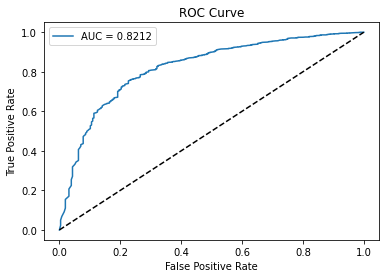

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

[0.998 0.997 0.928 ... 0.981 0.551 0.992]


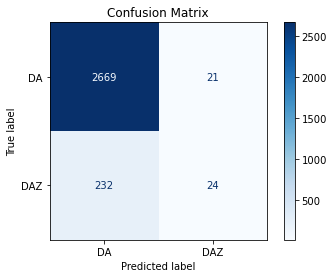

In [29]:
y_pred = []
for i in y_pred_proba:
    if i > 0.5 :
        y_pred.append(1)
    elif i <= 0.5 :
        y_pred.append(0)
print (y_pred_proba)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['DA','DAZ'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [30]:
data

,3847.6904,3848.5764,3849.4626,3850.349,3851.2358,3852.1228,3853.0098,3853.897,3854.7847,3855.6724,...,6688.059,6689.5996,6691.14,6692.6807,6694.222,6695.7637,6697.3057,6698.8477,6700.3906,wd_subclass
0,1.401641,-15.924921,12.17053,43.935257,13.352866,-0.958922,30.751305,17.331050,11.543040,-10.870653,...,4.525449,5.095497,4.234928,4.794764,5.965820,4.234310,4.073895,6.162295,4.391887,1
1,0.340451,39.321850,96.95255,59.952780,49.579453,2.106772,30.853228,68.127846,38.738255,30.705740,...,8.622414,10.219061,9.293289,8.402941,7.801483,7.767938,7.887807,9.083275,10.359595,1
2,90.410576,72.741806,80.37630,81.740350,95.025150,96.718460,59.218792,91.619460,76.982025,79.829170,...,32.816840,32.305386,30.800816,35.627293,34.485073,33.750920,30.536829,30.124290,32.247017,1
3,82.717730,104.292206,87.98204,97.919210,95.674380,96.730340,121.290480,92.193184,115.548490,109.607440,...,23.460505,22.019167,23.856443,22.434275,23.262499,24.345755,23.040964,21.792454,21.794620,1
4,-0.785483,2.712233,16.83574,1.124182,4.654962,7.689255,4.296149,7.754487,2.004906,8.411777,...,7.451107,8.597365,6.658686,5.471281,4.953662,4.457098,4.703722,5.737448,4.277687,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14724,119.218735,122.291740,143.37620,128.855580,138.123340,158.631320,146.257490,162.929980,132.273040,146.933460,...,70.146580,68.331080,68.249510,68.377240,68.215225,66.501010,72.868650,71.160660,68.891426,0
14725,344.490400,363.754640,364.44135,386.169220,409.724820,396.924200,413.828740,408.936770,413.745820,439.973800,...,104.147490,104.090340,105.733864,104.910370,104.441530,103.763590,104.047270,106.301230,103.239624,0
14726,89.677960,106.991066,99.13749,84.553040,98.929405,91.442870,78.809525,120.445990,93.562960,102.938820,...,33.222122,34.986860,35.193813,33.162850,36.758280,33.305927,35.070080,34.179325,33.457424,0
14727,95.172730,110.889690,102.95127,91.985290,108.232720,109.160030,119.648895,123.737160,123.762250,103.204800,...,43.743217,43.360050,42.514526,42.498783,44.003550,43.714222,43.537315,43.766170,43.294464,0
